# IMDB's Most Popular Films
An exploration of movies on the Internat Movie Database from ten years (2006-2016). 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [6]:
# imdb 1000 most popular movies from the last ten years
movies = pd.read_csv('~/Desktop/Data_Science/IMDB-Movie-Data.csv')

## A look at the data
The dataframe provides details about each film.  Numerical and categorical information is provided, capturing creative elements, financial success and quality rubrics.

In [7]:
movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [4]:
movies.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


Although the data is for the most popular films from a span of ten years, there is a clear bias towards more recently released films.  Films from 2016 appear with significantly greater frequency.

This spike of representation for 2016 indicates data skewed towards films that are most current.  It is a snapshot of popularity at a specific time, and so it a reflection of the time at which the data was collected.

This popularity is a mutable.  A look at the number of votes for each film (imdb users rating the quality of each featue), provides an alternative picture of popularity over time.

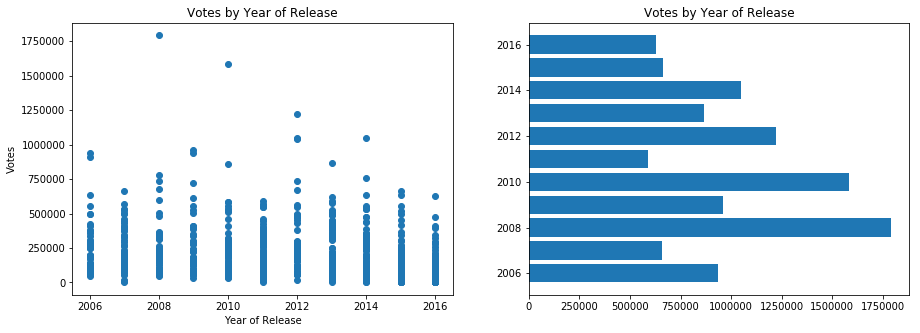

In [32]:
#scatterplot of release year and votes
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(x=movies['Year'], y=movies['Votes'])
plt.title('Votes by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Votes')

plt.subplot(1, 2, 2)
plt.barh(movies['Year'], movies['Votes'], align='center')
plt.xticks()
plt.title('Votes by Year of Release')

plt.show()

Here we can see that interest by year appears arbitrary, with some years showing increased total votes largely due to s very small number of titles (2008?  Hello, Avatar).

## Popularity
But what are these popular films?  What makes them popular?

### IMDB Rating
Let's look at the ratings of these popular films and identify how ratings might impact popularity. 
If we look at the whole of the top 1000, we can see that the majority of the films are not rated terribly high - the mean is under 7.  

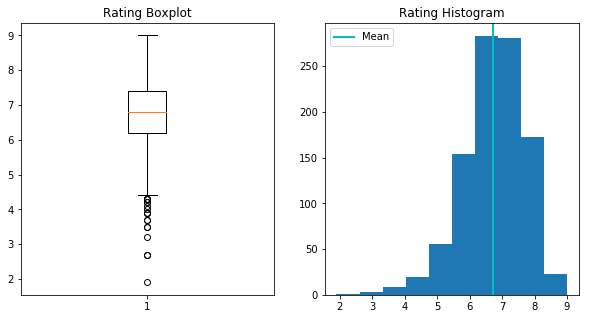

In [50]:
#IMDB rating

rating = movies['Rating']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(rating)
plt.title('Rating Boxplot')

plt.subplot(1, 2, 2)
plt.hist(rating)
plt.title('Rating Histogram')
plt.axvline(rating.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 

plt.show()

But perhaps the most popular films are more well rated...

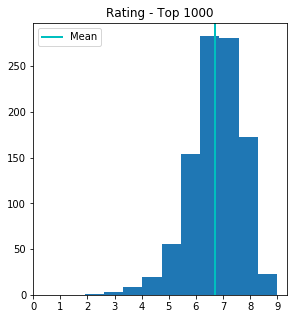

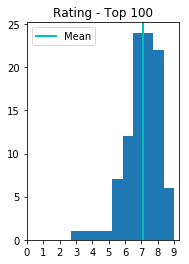

In [62]:
top_hundred = movies.iloc[1:100, ]
top_rating = top_hundred['Rating']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(rating) 
plt.xticks(range(0, 10))
plt.title('Rating - Top 1000')
plt.axvline(rating.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.show()

plt.subplot(1, 2, 2)
plt.hist(top_rating)
plt.xticks(range(0, 10))
plt.title('Rating - Top 100')
plt.axvline(top_rating.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper left') 
plt.show()

In [61]:
from scipy.stats import ttest_ind
print(ttest_ind(top_rating, rating, equal_var=False))
print(rating.mean())
print(top_rating.mean())

Ttest_indResult(statistic=3.1638389019737105, pvalue=0.001997515011408792)
6.723199999999999
7.075757575757576


By selecting only the top 100 and comparing the rating of those films to the top 1000, we can see that the ratings are very similar - the means are just a few tenths of a point off and high p-value indicates there is little difference between the Top 1000 and Top 100.

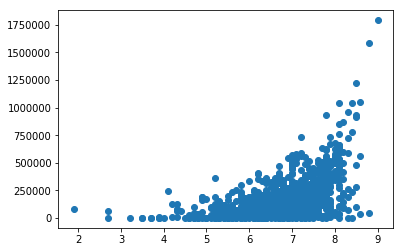

In [84]:
# Relating Ratings to Number of Votes

plt.scatter(x=movies['Rating'], y=movies['Votes'])
plt.show()

### Revenue
Since revenue can provide an indication of popuarity when a film is in theatrical release, perhaps financial success will be indicative of imdb popularity.
But here we must discount for titles with no revenue information.

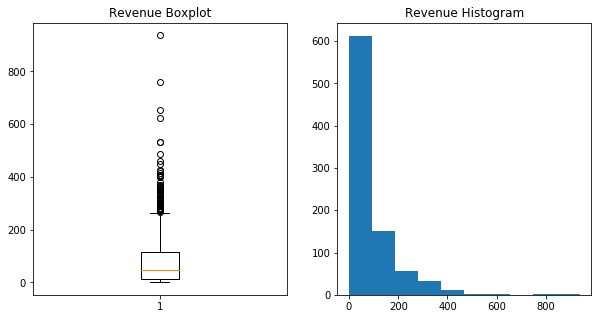

In [23]:
revenue = movies['Revenue (Millions)']
revenue = [x for x in revenue if str(x) != 'nan']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot(revenue)
plt.title('Revenue Boxplot')

plt.subplot(1, 2, 2)
plt.hist(revenue)
plt.title('Revenue Histogram')

plt.show()

And again comparing the Top 100 and the Top 1000...top_hundred['Revenue (Millions)']

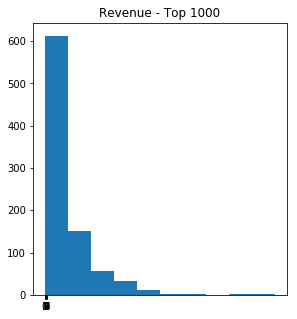

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

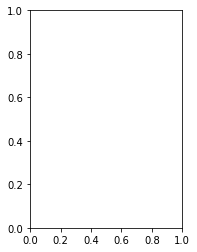

In [94]:
top_revenue = movies.loc[:100, 'Revenue (Millions)']

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(revenue) 
plt.xticks(range(0, 10))
plt.title('Revenue - Top 1000') 
plt.show()

plt.subplot(1, 2, 2)
plt.hist(top_revenue)
plt.xticks(range(0, 10))
plt.title('Revenue - Top 100') 
plt.show()

### Actors
Actors are often the most well compensated contributors to a film.  But is that remuneration justified with popularity?  While the data provided does not provide an exhaustive list of actors in each film, and nor does it incidate the size of the role of each actor, it does list the actors with the most substantive roles in each film.
To examine this information, we first need to break down each film's list and create a dataframe for the actors alone.  Then we can look at how many times any actor appears on a film in the list.

In [70]:
filmActor = movies['Actors'].str.split(',').tolist()

actors = []

for entry in filmActor:
    for name in entry:
        actors.append(name)
actor_df = pd.DataFrame(actors, columns=['actor'])

actor_df.describe()

,actor
count,3999
unique,2394
top,Mark Wahlberg
freq,11


Text(0,0.5,'Film Counts by Actor')

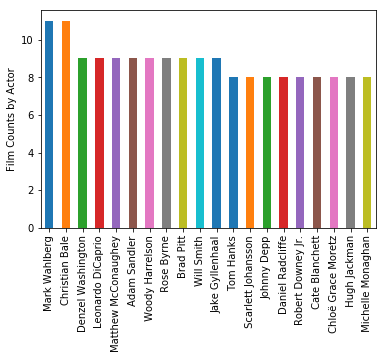

In [61]:
actor = actor_df['actor']
actor.value_counts().head(20).plot(kind='bar')
plt.ylabel('Film Counts by Actor')

Mark Walhlberg and Christian Bale are the most frequent actors in the Top 1000 films, with 11 appearances.  But when we check imdb for their total feature film credits during this period, we find that Mark Walhberg appeared in 13 other films and Christian Bale appeared in 5 other films that do not appear on the list.  Looking further down the list at the next group of actors (each with 9 appearances on the list), the spread of representation is even greater - ranging from 26% to 82% of all films by each actor in the time frame (Woody Harrelson with 34 films and Leonardo DiCaprio with 11 films).  The limited information provided by the data does not offer any insights on the influence of an actor on the popularity of the film.

### Director
The director is often considered the author of the film (at least in auteur theory), so perhaps the director plays a more significant role in popularity.

Text(0,0.5,'Film Counts by Director')

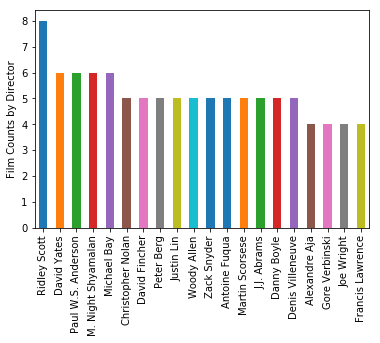

In [73]:
director = movies['Director']
director.value_counts().head(20).plot(kind='bar')
plt.ylabel('Film Counts by Director')

The most popular director on the list is Ridley Scott; he appears with 8 films.  Interestingly, Ridley Scott is credited with only eight feature films in the ten years of 2006-2016 - every film he directed in that time frame appears on the list of popular films.  This would seem to indicate that future Ridley Scott films would also be popular with imdb users.  
As we move down the director list, we see that the top 15 directors are similarly generating consistently popular films - half of these directors also have all of their feature films listed (David Yates, Michael Bay, M Night Shyamalan, David Fincher, Martin Scorsese, Christopher Nolan, and JJ Abrams).  It isn't until we find Woody Allen, with his very prolific roster of 11 films, that we find a director without the vast majority of his projects appearing on this list.

## Genre
Are any genres more prevelent than others?

In [76]:
filmGenre = movies['Genre'].str.split(',').tolist()

genre = []

for entry in filmGenre:
    for kind in entry:
        genre.append(kind)
genre_df = pd.DataFrame(genre, columns=['genre'])

genre_df.describe()

,genre
count,2555
unique,20
top,Drama
freq,513


Text(0,0.5,'Film Counts by Genre')

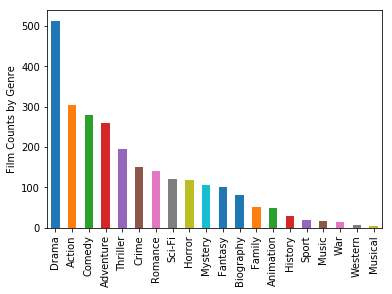

In [77]:
genre = genre_df['genre']
genre.value_counts().head(20).plot(kind='bar')
plt.ylabel('Film Counts by Genre')